In [19]:
import pandas as pd
import numpy as np 

pd.options.mode.chained_assignment = None

pd.set_option('display.max_columns', 60)
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize
import seaborn as sns
import plotly
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf

In [46]:
pheno = pd.read_csv('RiceDiversityPheno.csv')
pheno.info()
pheno_des = pheno.describe()

line = pd.read_csv('RiceDiversityLine.csv')
data = pd.concat([pheno, line], axis=1, sort=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 38 columns):
HybID                               413 non-null object
NSFTVID                             413 non-null int64
Flowering time at Arkansas          374 non-null float64
Flowering time at Faridpur          305 non-null float64
Flowering time at Aberdeen          359 non-null float64
FT ratio of Arkansas/Aberdeen       349 non-null float64
FT ratio of Faridpur/Aberdeen       304 non-null float64
Culm habit                          384 non-null float64
Leaf pubescence                     288 non-null float64
Flag leaf length                    377 non-null float64
Flag leaf width                     377 non-null float64
Awn presence                        369 non-null float64
Panicle number per plant            372 non-null float64
Plant height                        383 non-null float64
Panicle length                      375 non-null float64
Primary panicle branch number       375 non

In [6]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
            columns={0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=True).round(1)
    print("Your selected dataframe has " + str(df.shape[1]) + " columns. \n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) + 
          " columns that have missing values")
    return mis_val_table_ren_columns

# Missing values

Your selected dataframe has 50 columns. 
There are 40 columns that have missing values


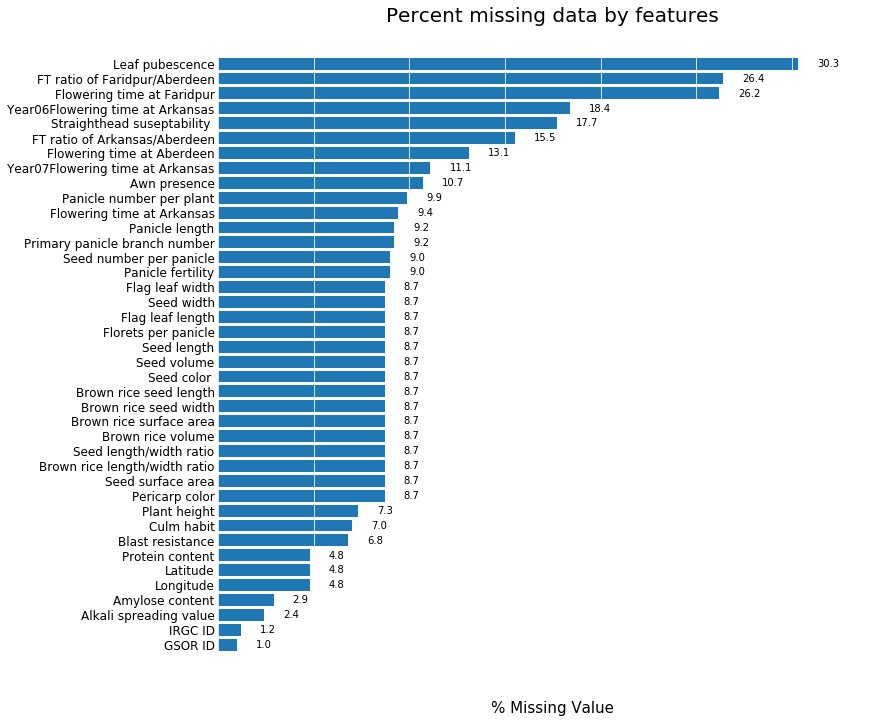

In [7]:
mis_val_tab = missing_values_table(data)
plt.figure(figsize=(12,12))
ax = plt.gca()
features = mis_val_tab.index
per_miss = mis_val_tab['% of Total Values'].values
nums = np.arange(len(mis_val_tab))
plt.barh(nums, per_miss)
for p, c, ch in zip(nums, features, per_miss):
    plt.annotate(str(ch), xy=(ch + 1, p), va='center', fontsize=10)
ticks = plt.yticks(nums, features)
xt = plt.xticks()[0]
plt.xticks(xt, [' '] * len(xt))
plt.grid(axis = 'x', color='white', linestyle='-')
plt.xlabel('% Missing Value', fontsize=15)
plt.title('Percent missing data by features', fontsize=20)
ax.tick_params(axis='both', which='both', length=0)
sns.despine(left=True, bottom=True)

# The correlation analysis

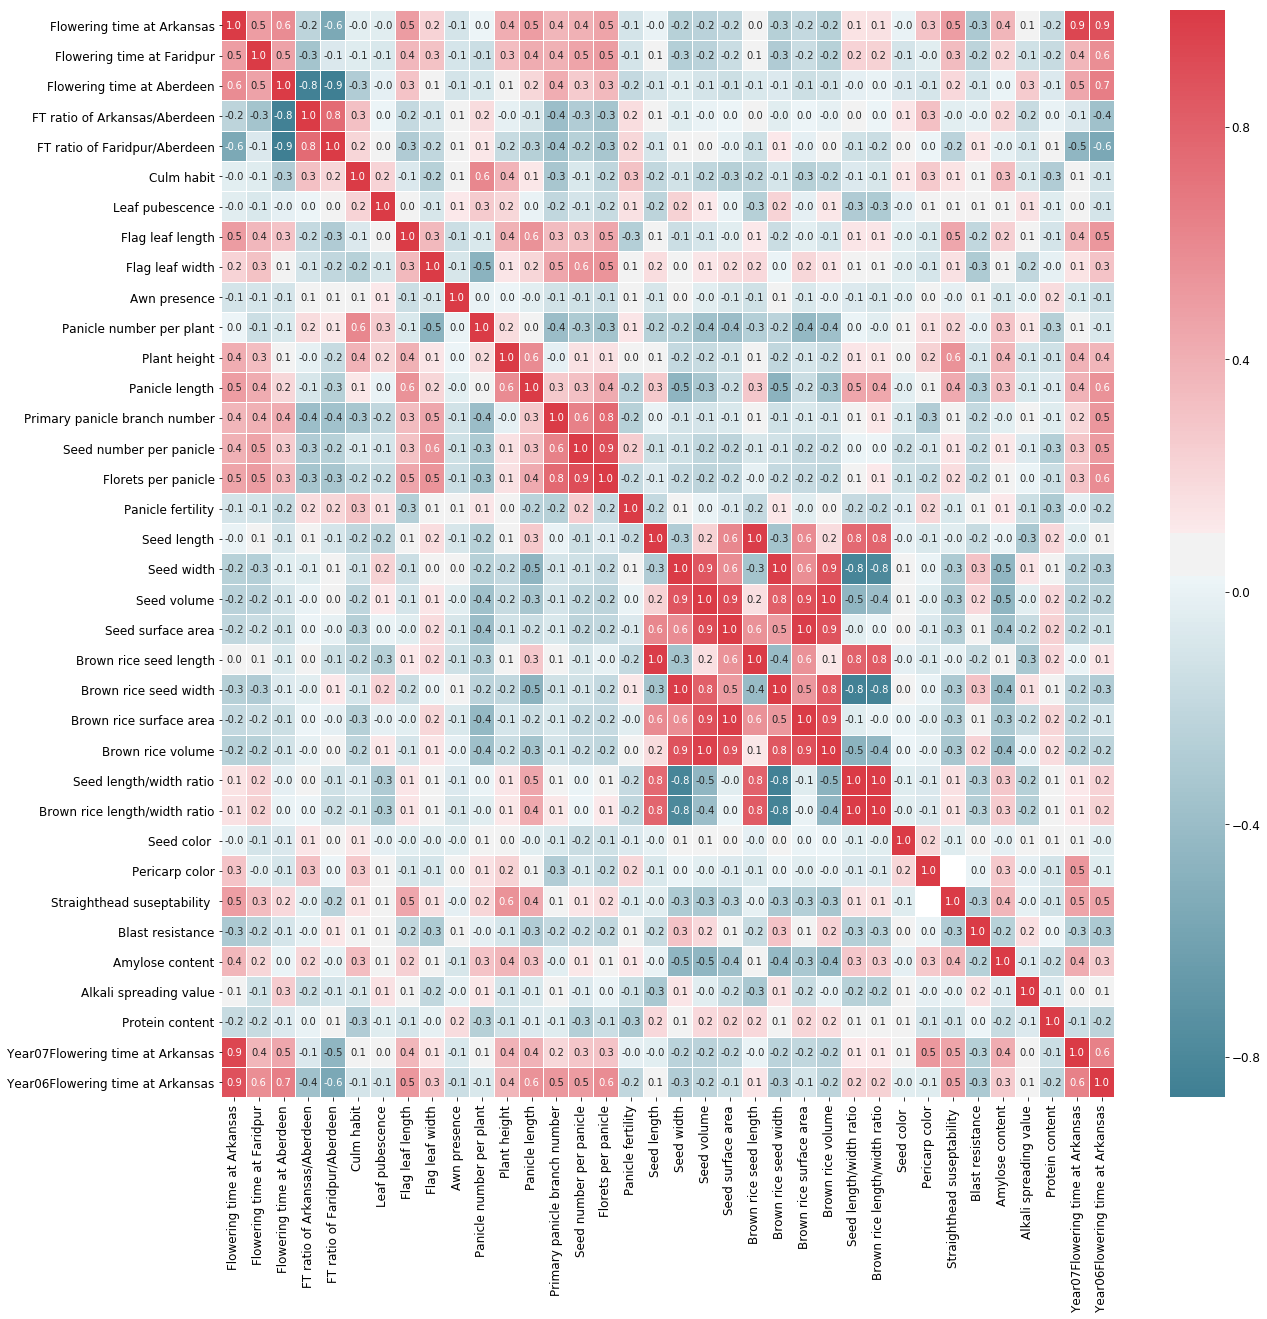

In [9]:
pheno_data = pheno.drop(columns=['HybID', 'NSFTVID'])
plt.figure(figsize=(20,20))
corr_pheno = pheno_data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
hm_pheno = sns.heatmap(round(corr_pheno,2), annot=True,
cmap=cmap, fmt='.1f', annot_kws={"size":10}, linewidths=.05)

# The flowering time

In [10]:
flowering_time = ['Flowering time at Arkansas', 'Flowering time at Faridpur', 
                  'Flowering time at Aberdeen', 'FT ratio of Arkansas/Aberdeen',
                  'FT ratio of Faridpur/Aberdeen']
data_flower = pheno[flowering_time]
data_flower.rename(columns={'Flowering time at Arkansas': 'Arkansas', 
                            'Flowering time at Faridpur': 'Faridpur',
                            'Flowering time at Aberdeen': 'Aberdeen',
                            'FT ratio of Arkansas/Aberdeen': 'Arkansas/Aberdeen', 
                            'FT ratio of Faridpur/Aberdeen': 'Faridpur/Aberdeen'}, inplace=True)

In [11]:
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x,y)[0][1]
    ax = plt.gca()
    ax.annotate("corr = {:.2f}".format(r), 
                xy={.2, .8}, xycoords=ax.transAxes, size=20)

/home/tungutokyo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



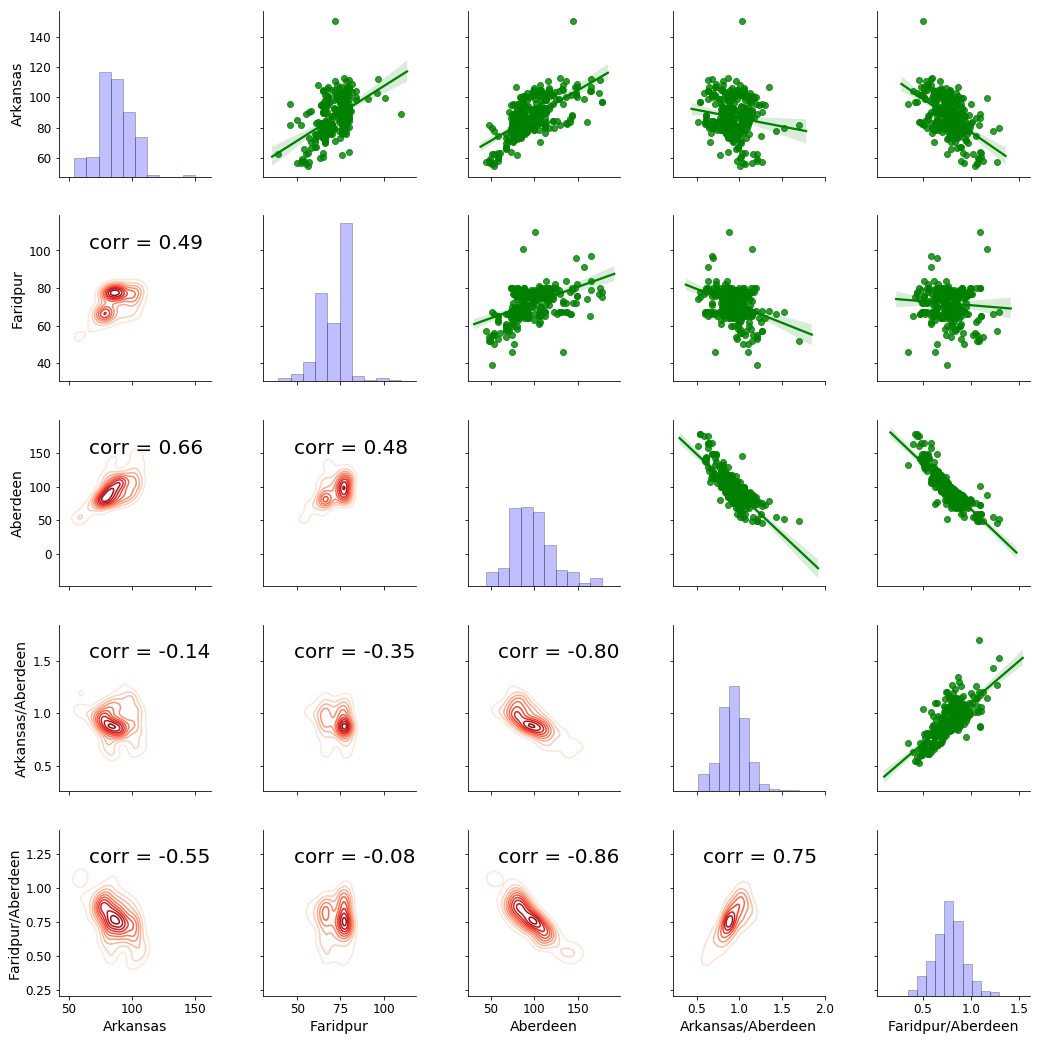

In [12]:
grid = sns.PairGrid(data=data_flower.dropna(), height=3)
grid.map_upper(sns.regplot, color='green')
grid.map_diag(plt.hist, color='blue', edgecolor='black', alpha=0.25)
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap=plt.cm.Reds)

In [47]:
data_flower['SubPop'] = data['Sub-population']

In [37]:
hist_data = [data_flower['Arkansas'].dropna()]
group_label = ['Arkansas']
fig = ff.create_distplot(hist_data, group_label, curve_type='kde')
fig['layout'].update(title='Displot of Flowering Time at Arkansas', xaxis=dict(title='Days'),
                    height = 600, width = 900)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='Displot with Flowering time at Arkansas')

TEJ = data_flower[data_flower['SubPop'] == 'TEJ']['Arkansas']
IND = data_flower[data_flower['SubPop'] == 'IND']['Arkansas']
AUS = data_flower[data_flower['SubPop'] == 'AUS']['Arkansas']
AROMATIC = data_flower[data_flower['SubPop'] == 'AROMATIC']['Arkansas']
TRJ = data_flower[data_flower['SubPop'] == 'TRJ']['Arkansas']
ADMIX = data_flower[data_flower['SubPop'] == 'ADMIX']['Arkansas']
trace1 = go.Box(y=TEJ, name = 'TEJ', boxmean='sd')
trace2 = go.Box(y=IND, name = 'IND', boxmean='sd')
trace3 = go.Box(y=AUS, name = 'AUS', boxmean='sd')
trace4 = go.Box(y=AROMATIC, name = 'AROMATIC', boxmean='sd')
trace5 = go.Box(y=TRJ, name = 'TRJ', boxmean='sd')
trace6 = go.Box(y=ADMIX, name = 'ADMIX', boxmean='sd')
data = [trace1, trace2, trace3, trace4, trace5, trace6]
fig = go.Figure(data=data)
fig['layout'].update(title='Flowering Time at Arkansas', xaxis=dict(title='Sub-Population'),
                    yaxis=dict(title='Arkansas'), height=600, width=900)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='Displot with Flowering time at Arkansas')

In [39]:
hist_data = [data_flower['Faridpur'].dropna()]
group_label = ['Faridpur']
fig = ff.create_distplot(hist_data, group_label, curve_type='kde')
fig['layout'].update(title='Displot of Flowering Time at Faridpur', xaxis=dict(title='days'), 
                    height = 600, width=900)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='Displot with Flowering time at Faridpur')

TEJ = data_flower[data_flower['SubPop'] == 'TEJ']['Faridpur']
IND = data_flower[data_flower['SubPop'] == 'IND']['Faridpur']
AUS = data_flower[data_flower['SubPop'] == 'AUS']['Faridpur']
AROMATIC = data_flower[data_flower['SubPop'] == 'AROMATIC']['Faridpur']
TRJ = data_flower[data_flower['SubPop'] == 'TRJ']['Faridpur']
ADMIX = data_flower[data_flower['SubPop'] == 'ADMIX']['Faridpur']
trace1 = go.Box(y=TEJ, name = 'TEJ', boxmean='sd')
trace2 = go.Box(y=IND, name = 'IND', boxmean='sd')
trace3 = go.Box(y=AUS, name = 'AUS', boxmean='sd')
trace4 = go.Box(y=AROMATIC, name = 'AROMATIC', boxmean='sd')
trace5 = go.Box(y=TRJ, name = 'TRJ', boxmean='sd')
trace6 = go.Box(y=ADMIX, name = 'ADMIX', boxmean='sd')
data = [trace1, trace2, trace3, trace4, trace5, trace6]
fig = go.Figure(data=data)
fig['layout'].update(title='Flowering Time at Faridpur', xaxis=dict(title='Sub-Population'),
                    yaxis=dict(title='Faridpur'), height=600, width=900)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='Displot with Flowering time at Arkansas')

# The plant morphology

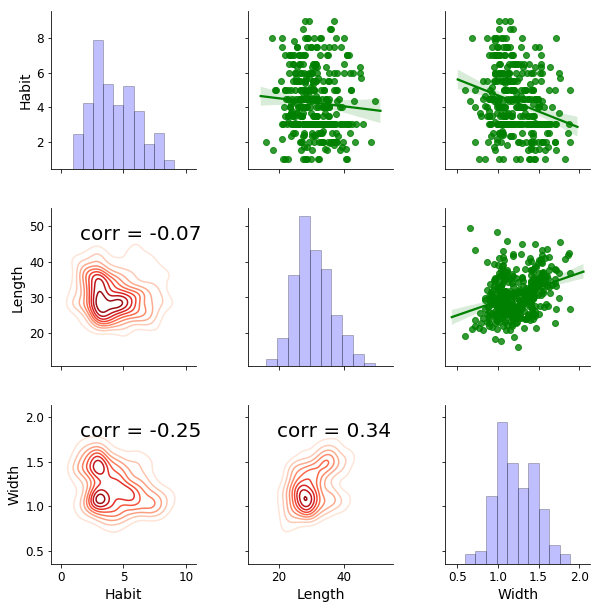

In [42]:
morphology = ['Culm habit', 'Flag leaf length', 
              'Flag leaf width']
data_morphology = pheno[morphology]
data_morphology.rename(columns={'Culm habit':'Habit', 
                                'Flag leaf length': 'Length',
                                'Flag leaf width': 'Width' 
                                }, inplace=True)

grid = sns.PairGrid(data=data_morphology.dropna(), height=3)
grid.map_upper(sns.regplot, color='green')
grid.map_diag(plt.hist, color='blue', edgecolor='black', alpha=0.25)
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot, cmap=plt.cm.Reds)

In [48]:
data_morphology['SubPop'] = data['Sub-population']

In [54]:
hist_data = [data_morphology['Habit'].dropna()]
group_label = ['Culm Habit']
fig = ff.create_distplot(hist_data, group_label, curve_type='kde')
fig['layout'].update(title='Displot of Culm Habit', xaxis=dict(title='Habit'),
                    height = 600, width=900)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='Displot of Culm Habit')

TEJ = data_morphology[data_morphology['SubPop'] == 'TEJ']['Habit']
IND = data_morphology[data_morphology['SubPop'] == 'IND']['Habit']
AUS = data_morphology[data_morphology['SubPop'] == 'AUS']['Habit']
AROMATIC = data_morphology[data_morphology['SubPop'] == 'AROMATIC']['Habit']
TRJ = data_morphology[data_morphology['SubPop'] == 'TRJ']['Habit']
ADMIX = data_morphology[data_morphology['SubPop'] == 'ADMIX']['Habit']
trace1 = go.Box(y=TEJ, name = 'TEJ', boxmean='sd')
trace2 = go.Box(y=IND, name = 'IND', boxmean='sd')
trace3 = go.Box(y=AUS, name = 'AUS', boxmean='sd')
trace4 = go.Box(y=AROMATIC, name = 'AROMATIC', boxmean='sd')
trace5 = go.Box(y=TRJ, name = 'TRJ', boxmean='sd')
trace6 = go.Box(y=ADMIX, name = 'ADMIX', boxmean='sd')
data = [trace1, trace2, trace3, trace4, trace5, trace6]
fig = go.Figure(data=data)
fig['layout'].update(title='Culm habit among subpopulation', xaxis=dict(title='Sub-Population'),
                    yaxis=dict(title='Habit'), height=600, width=900)
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot(fig, filename='Box Plot for Culm habit')